In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data_dir = '../../results/data/experiment2_postbug'
df = None
# Load data
for file in os.listdir(data_dir):
    if not file.endswith('.csv'):
        continue
    if df is None:
        df = pd.read_csv(f'{data_dir}/{file}')
    else:
        df = pd.concat([df, pd.read_csv(f'{data_dir}/{file}')])

filtered_df = df[(df['region'] == 'Avg') & (df['score_type'] == 'f1')]
# df = pd.read_csv(f'{data_dir}/709551_set1_entropy_bb-True_default.csv')

data_dir_baseline = '../../results/data/experiment2_postbug/baseline'
df_baseline = None
for file in os.listdir(data_dir_baseline):
    if not file.endswith('.csv'):
        continue
    if df_baseline is None:
        df_baseline = pd.read_csv(f'{data_dir_baseline}/{file}')
    else:
        df_baseline = pd.concat([df_baseline, pd.read_csv(f'{data_dir_baseline}/{file}')])

In [4]:
# df_baseline['uncertainty_measure'] = 'baseline'
# df = pd.concat([df, df_baseline])

In [7]:
df.head()

,iteration,region,score_type,score,subject_id,labelset,uncertainty_measure,background_bias,guidance,feature,bb_flipped_fg_frac
0,0,Other,precision,0.949242,677968,set2,entropy,True,log,tta,0.426032
1,0,Other,recall,0.457303,677968,set2,entropy,True,log,tta,0.426032
2,0,Other,f1,0.617247,677968,set2,entropy,True,log,tta,0.426032
3,0,IFO_left,precision,0.516330,677968,set2,entropy,True,log,tta,0.426032
4,0,IFO_left,recall,0.554657,677968,set2,entropy,True,log,tta,0.426032


In [18]:
filtered_df

,iteration,region,score_type,score,subject_id,labelset,uncertainty_measure,background_bias,guidance,feature,bb_flipped_fg_frac
47,1,Avg,f1,0.577705,677968,set2,entropy,True,log,tta,0.118451
71,2,Avg,f1,0.632052,677968,set2,entropy,True,log,tta,0.089958
95,3,Avg,f1,0.672978,677968,set2,entropy,True,log,tta,0.047239
119,4,Avg,f1,0.691644,677968,set2,entropy,True,log,tta,0.039767
143,5,Avg,f1,0.710350,677968,set2,entropy,True,log,tta,0.036687
...,...,...,...,...,...,...,...,...,...,...,...
35,1,Avg,f1,0.467431,705341,set1,entropy,True,log,tta,0.090516
53,2,Avg,f1,0.547405,705341,set1,entropy,True,log,tta,0.061041
71,3,Avg,f1,0.565918,705341,set1,entropy,True,log,tta,0.020933
89,4,Avg,f1,0.612633,705341,set1,entropy,True,log,tta,0.016173


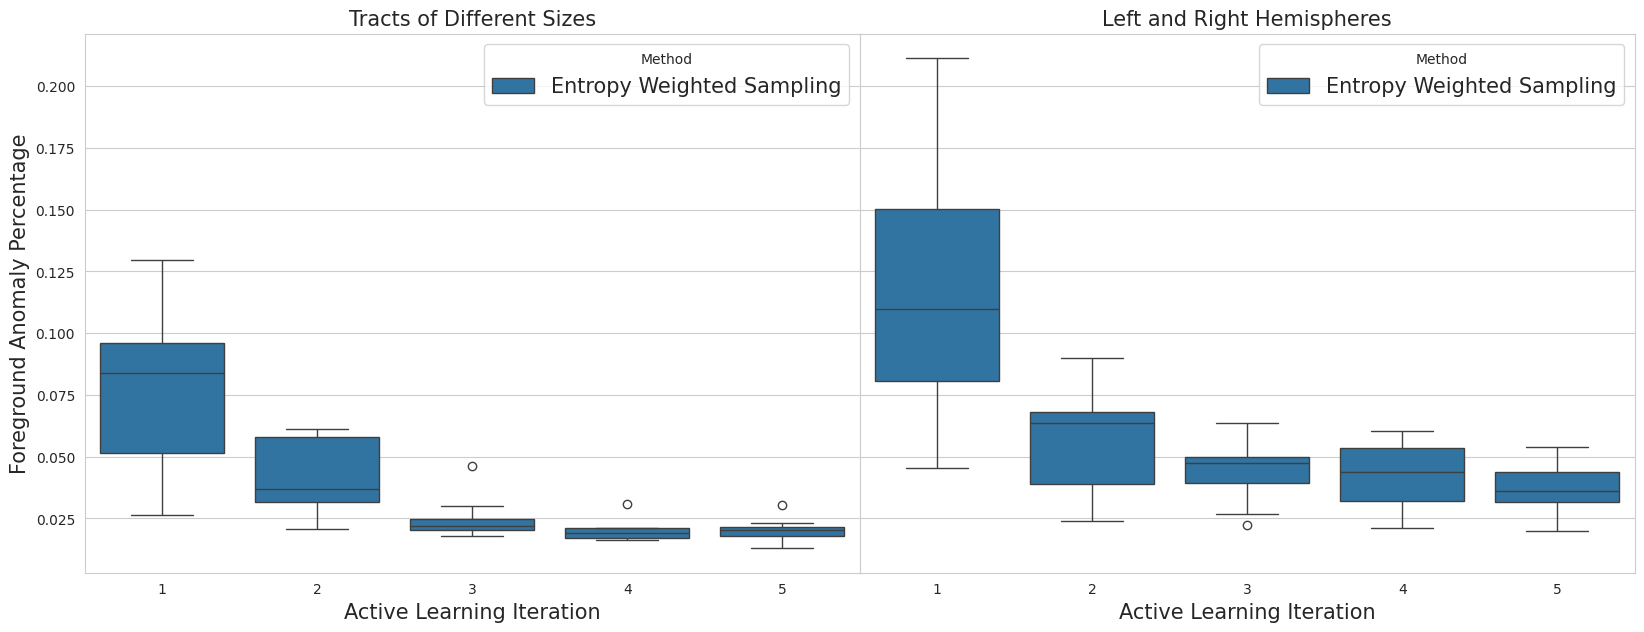

In [28]:
sns.set_style("whitegrid")

filtered_df = df[
    (df['region'] == 'Avg') &
    (df['score_type'] == 'f1') & 
    (df['iteration'] > 0) &
    # (df['uncertainty_measure'] != 'ground-truth') &
    (df['uncertainty_measure'] == 'entropy') &
    (df['uncertainty_measure'] != 'baseline') 
    # (df['region'] != 'Other')
]


# Get unique labelsets
labelsets = ['set1', 'set2']
# hue_order = ['baseline', 'random', 'entropy', 'ground-truth']

method_name_mapping = {
    'random': 'Random Sampling',
    'entropy': 'Entropy Weighted Sampling',
    # 'ground-truth': 'Error Sampling',
    # 'baseline': 'Vanilla'
}

labelset_name_mapping = {
    'set1': 'Tracts of Different Sizes',
    'set2': 'Left and Right Hemispheres',
}

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(20, 7), sharey=True)

for ax, labelset in zip(axes, labelsets):
    subset = filtered_df[filtered_df['labelset'] == labelset]
    
    # Create boxplot
    sns.boxplot(
        data=subset,
        x='iteration',
        y='bb_flipped_fg_frac',
        hue='uncertainty_measure',
        ax=ax,
        # hue_order=hue_order,
        # errorbar='ci'
    )
    ax.set_title(f'{labelset_name_mapping[labelset]}', fontsize=15)
    ax.set_xlabel('Active Learning Iteration', fontsize=15)
    ax.set_ylabel('Foreground Anomaly Percentage', fontsize=15)

    handles, labels = ax.get_legend_handles_labels()
    labels = [method_name_mapping[label]  for label in labels]

    ax.legend(handles, labels, title='Method', loc='upper right', fontsize=15)
    
plt.subplots_adjust(wspace=0, hspace=0)

fig.savefig(f'{data_dir}/supplement_FPE.jpg', bbox_inches='tight', dpi=300)